In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
base_dir = '/home/rohit-ubuntu18_04/bboxes/'
ann_file = os.path.join(base_dir, 'all_annotations.csv')
class_mapping = os.path.join(base_dir, 'class_mapping.csv')

In [4]:
LABELS_orig = open(class_mapping).read().strip().split('\n')
LABELS = {L.split(",")[0]: int(L.split(",")[1]) for L in LABELS_orig}
LABELS_REV = {int(L.split(",")[1]): L.split(",")[0] for L in LABELS_orig}

In [5]:
def draw_box(image, box, color, thickness=2):
    b = np.array(box).astype(int)
    cv2.rectangle(image, (b[0], b[1]), (b[2], b[3]), color, thickness, cv2.LINE_AA)
    
def draw_caption(image, box, caption):
    b = np.array(box).astype(int)
    cv2.putText(image, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 10, (0, 0, 0), 20)
    #cv2.putText(image, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)

In [6]:
import warnings


def label_color(label):
    """ Return a color from a set of predefined colors. Contains 80 colors in total.
    Args
        label: The label to get the color for.
    Returns
        A list of three values representing a RGB color.
        If no color is defined for a certain label, the color green is returned and a warning is printed.
    """
    if label < len(colors):
        return colors[label]
    else:
        warnings.warn('Label {} has no color, returning default.'.format(label))
        return (0, 255, 0)

colors = [
    [31  , 0   , 255] ,
    [0   , 159 , 255] ,
    [255 , 95  , 0]   ,
    [255 , 19  , 0]   ,
    [255 , 0   , 0]   ,
    [255 , 38  , 0]   ,
    [0   , 255 , 25]  ,
    [255 , 0   , 133] ,
    [255 , 172 , 0]   ,
    [108 , 0   , 255] ,
    [0   , 82  , 255] ,
    [0   , 255 , 6]   ,
    [255 , 0   , 152] ,
    [223 , 0   , 255] ,
    [12  , 0   , 255] ,
    [0   , 255 , 178] ,
    [108 , 255 , 0]   ,
    [184 , 0   , 255] ,
    [255 , 0   , 76]  ,
    [146 , 255 , 0]   ,
    [51  , 0   , 255] ,
    [0   , 197 , 255] ,
    [255 , 248 , 0]   ,
    [255 , 0   , 19]  ,
    [255 , 0   , 38]  ,
    [89  , 255 , 0]   ,
    [127 , 255 , 0]   ,
    [255 , 153 , 0]   ,
    [0   , 255 , 255] ,
    [0   , 255 , 216] ,
    [0   , 255 , 121] ,
    [255 , 0   , 248] ,
    [70  , 0   , 255] ,
    [0   , 255 , 159] ,
    [0   , 216 , 255] ,
    [0   , 6   , 255] ,
    [0   , 63  , 255] ,
    [31  , 255 , 0]   ,
    [255 , 57  , 0]   ,
    [255 , 0   , 210] ,
    [0   , 255 , 102] ,
    [242 , 255 , 0]   ,
    [255 , 191 , 0]   ,
    [0   , 255 , 63]  ,
    [255 , 0   , 95]  ,
    [146 , 0   , 255] ,
    [184 , 255 , 0]   ,
    [255 , 114 , 0]   ,
    [0   , 255 , 235] ,
    [255 , 229 , 0]   ,
    [0   , 178 , 255] ,
    [255 , 0   , 114] ,
    [255 , 0   , 57]  ,
    [0   , 140 , 255] ,
    [0   , 121 , 255] ,
    [12  , 255 , 0]   ,
    [255 , 210 , 0]   ,
    [0   , 255 , 44]  ,
    [165 , 255 , 0]   ,
    [0   , 25  , 255] ,
    [0   , 255 , 140] ,
    [0   , 101 , 255] ,
    [0   , 255 , 82]  ,
    [223 , 255 , 0]   ,
    [242 , 0   , 255] ,
    [89  , 0   , 255] ,
    [165 , 0   , 255] ,
    [70  , 255 , 0]   ,
    [255 , 0   , 172] ,
    [255 , 76  , 0]   ,
    [203 , 255 , 0]   ,
    [204 , 0   , 255] ,
    [255 , 0   , 229] ,
    [255 , 133 , 0]   ,
    [127 , 0   , 255] ,
    [0   , 235 , 255] ,
    [0   , 255 , 197] ,
    [255 , 0   , 191] ,
    [0   , 44  , 255] ,
    [50  , 255 , 0]
]

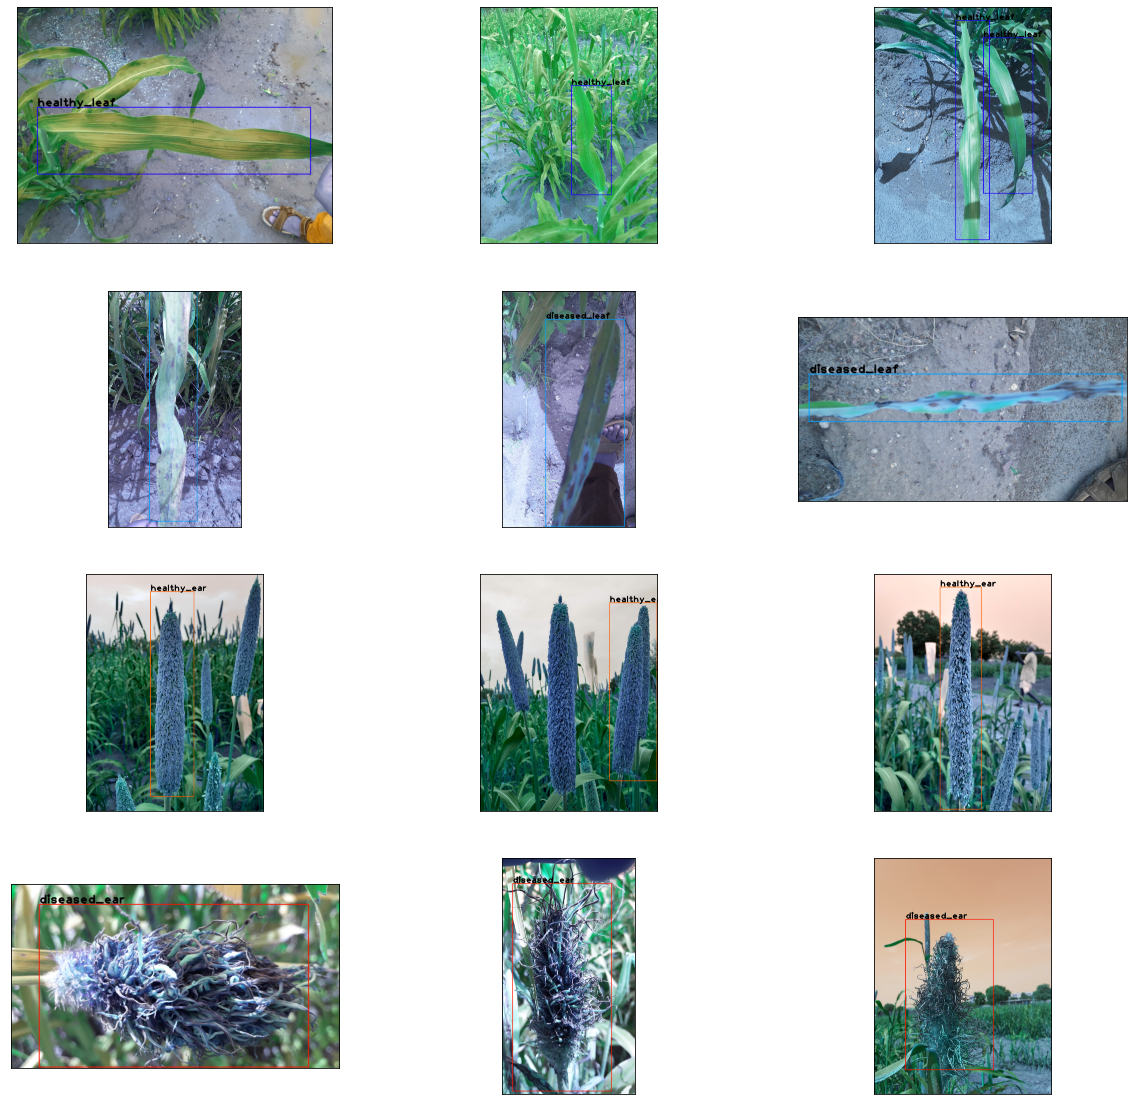

In [10]:
# plt.figure(figsize=(30,15))
ann = open(ann_file, "r")
lines = ann.readlines()
i=179
j=0
no_images = 12
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

img_points = [689,690,754,354,405,365,258,327,337,30,1,103]

axs = axs.flat

for i in img_points:
    box=lines[i].strip().split(',')
    img = cv2.imread(os.path.join(base_dir, box[0]))
    while(lines[i].strip().split(',')[0] == box[0]):
        next_box = lines[i].strip().split(',')
        draw_box(img, next_box[2:], label_color(int(next_box[1])) , 10)
        draw_caption(img, next_box[2:], LABELS_REV[int(next_box[1])])
        i+=1
    axs[j].imshow(img) 
    j += 1

ann.close()
        

In [11]:
#print number of images (since the annotations file can contain more than one line for a particular image)
with open(ann_file) as f:
    content = f.readlines()
    content = [line.strip().split(',')[0] for line in content]
print(f'total number of images - {len(set(content))}')

total number of images - 756
